# 개 vs. 고양이 Redux: 커널 에디션
개와 고양이의 이미지를 구별하세요

In [8]:
## 임포트
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torchvision 
import torchvision.transforms as transforms 
import os 
import torchvision.utils 
from PIL import Image

In [9]:
## GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [11]:
## 데이터 가져오기

### 데이터 정규화
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5,0.5), (0.5, 0.5, 0.5)) ## RGb별 처리
])

### 훈련 데이터
trainset = torchvision.datasets.CIFAR10(root = './train',
                                        train = True,
                                        download = True,
                                        transform = transform)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size = 64,
    shuffle = True,
    num_workers = 2
)


In [13]:
### 테스트 데이터
testset = torchvision.datasets.CIFAR10(root = './test',
                                       train = False,
                                       download = True,
                                       transform = transform)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle = False,
    num_workers=2
)

100%|██████████████████████████████████████████████████████████████████████████| 170M/170M [00:37<00:00, 4.50MB/s]


In [14]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [16]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

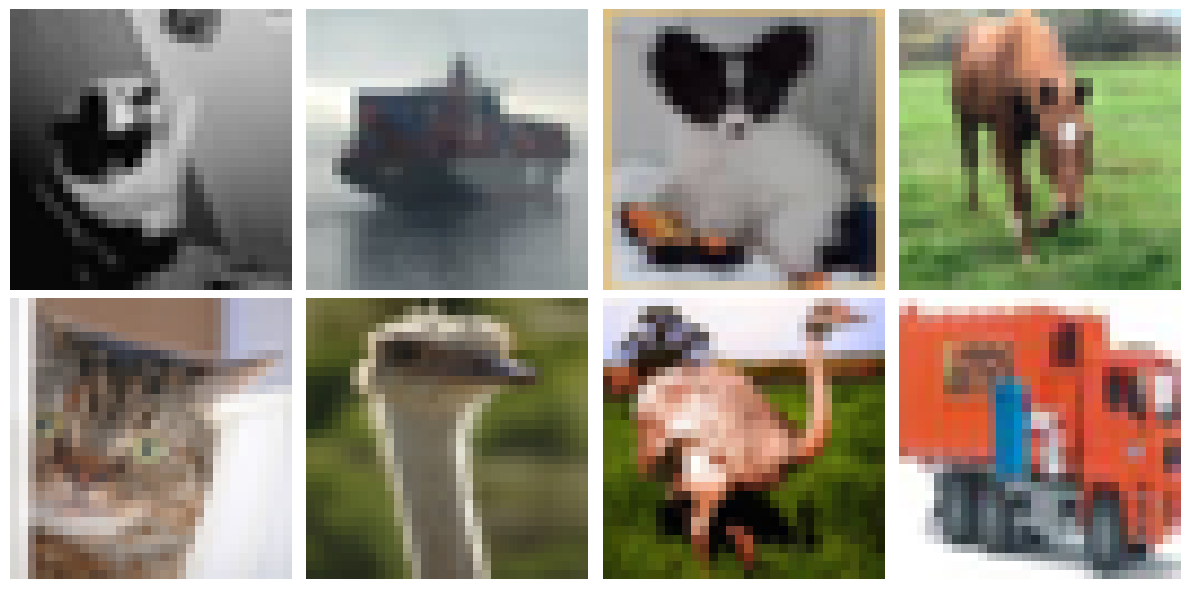

In [22]:
## 시각화
import matplotlib.pyplot as plt
import numpy as np

### 클래스 이름 정의
classes = ('dog', 'cat')

# ### 이미지 시각화 함수
# def imshow(img):
#     img = img / 2 + 0.5 ## 정규화 해제
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1,2,0)))
#     plt.axis('off')

# ### 일부 이미지 시각화
# dataiter_train = iter(trainloader)
# train_images, train_labels = next(dataiter_train)
# dataiter_test = iter(testloader)
# test_images, test_labels = next(dataiter_test)

# ### 이미지 그리드 생성
# fig, axes = plt.subplots(2, 4, figsize = (12,6))
# axes = axes.ravel()

# for i in range(4):
#     imshow(test_images[i])
#     imshow(train_images[i])
    
#     axes[i].imshow(np.transpose(train_images[i].numpy() / 2 + 0.5, (1, 2, 0)))
#     axes[i].imshow(np.transpose(test_images[i].numpy() / 2 + 0.5, (1, 2, 0)))

#     axes[i].set_title(classes[train_labels[i]])
#     axes[i].set_title(classes[test_labels[i]])
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()



### 이미지 시각화 함수
def imshow(img):
    img = img / 2 + 0.5     # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

### 학습 데이터의 일부 이미지 시각화
dataiter = iter(trainloader)
train_images, train_labels = next(dataiter)

### 이미지 그리드 생성
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i in range(8):
    imshow(train_images[i])
    axes[i].imshow(np.transpose(train_images[i].numpy() / 2 + 0.5, (1, 2, 0)))
    # axes[i].set_title(classes[train_labels[i]])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [23]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class CatDogDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        for filename in os.listdir(root_dir):
            if filename.endswith('.png') or filename.endswith('.jpg'):
                self.images.append(filename)
                if 'cat' in filename.lower():
                    self.labels.append(0)  # 고양이 = 0
                elif 'dog' in filename.lower():
                    self.labels.append(1)  # 강아지 = 1
                else:
                    continue  # 예외 처리

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [25]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = CatDogDataset(root_dir='./train', transform=transform)

from torch.utils.data import DataLoader
trainloader = DataLoader(dataset, batch_size=8, shuffle=True)

classes = ['cat', 'dog']


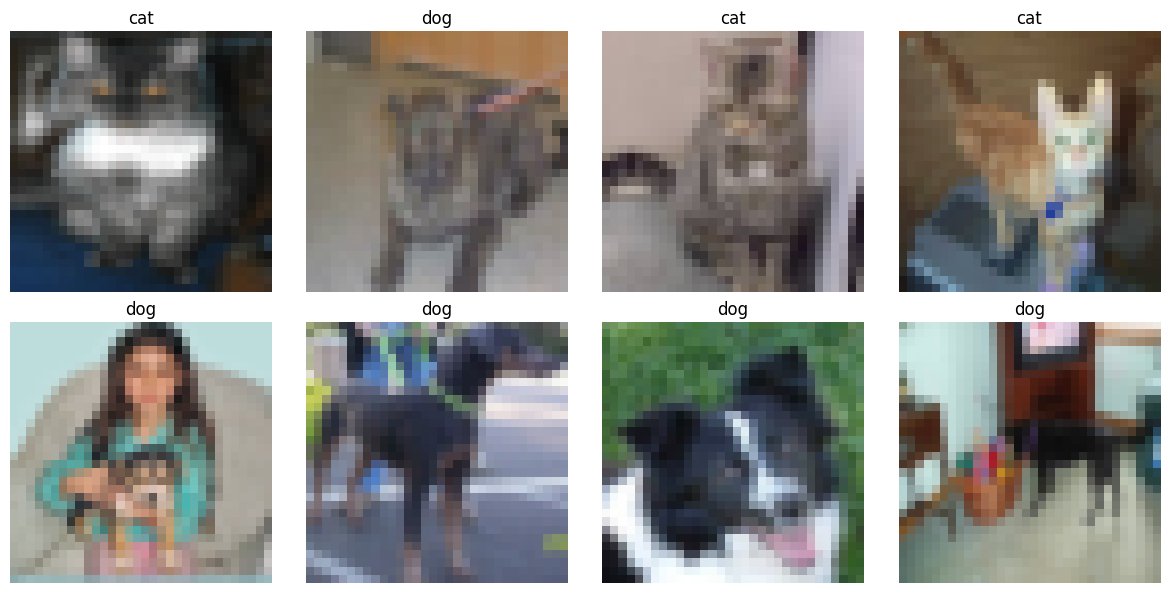

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 클래스 
classes = ['cat', 'dog']

# 정규화 해제 후 이미지 보여주는 함수
def imshow(img):
    img = img / 2 + 0.5  # 정규화 해제
    npimg = img.numpy()
    return np.transpose(npimg, (1, 2, 0))

# 학습 데이터 일부 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 시각화 (2행 4열)
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i in range(8):
    axes[i].imshow(imshow(images[i]))
    axes[i].set_title(classes[labels[i]])
    axes[i].axis('off')

plt.tight_layout()
plt.show()
